# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 data points for each feature
snowpack_depth = np.random.uniform(50, 300, 1000)  # Snowpack depth in centimeters (50 cm to 300 cm)
snow_density = np.random.uniform(0.1, 0.5, 1000)  # Snow density in grams per cubic centimeter (0.1 g/cm^3 to 0.5 g/cm^3)
slope_angle = np.random.uniform(20, 45, 1000)  # Slope angle in degrees (20° to 45°)
temp_gradient = np.random.uniform(-0.05, 0.05, 1000)  # Temperature gradient in degrees Celsius per meter (-0.05°C/m to 0.05°C/m)
snowfall_intensity = np.random.uniform(0, 10, 1000)  # Snowfall intensity in centimeters per hour (0 cm/h to 10 cm/h)

# Display the first few data points for each feature
print("Snowpack Depth (cm):", snowpack_depth[:5])
print("Snow Density (g/cm^3):", snow_density[:5])
print("Slope Angle (degrees):", slope_angle[:5])
print("Temperature Gradient (°C/m):", temp_gradient[:5])
print("Snowfall Intensity (cm/h):", snowfall_intensity[:5])


Snowpack Depth (cm): [143.63502971 287.6785766  232.99848545 199.66462105  89.00466011]
Snow Density (g/cm^3): [0.17405317 0.31676038 0.44917833 0.39288995 0.42262446]
Slope Angle (degrees): [26.54264209 26.17446998 42.65636451 26.238655   26.79874315]
Temperature Gradient (°C/m): [ 0.0172703   0.02966814 -0.02495321  0.01248741  0.0071746 ]
Snowfall Intensity (cm/h): [5.71995878 8.05432329 7.6016093  1.53899905 1.4924947 ]


In [3]:
df=pd.DataFrame(data={
    'SnowPack Depth':snowpack_depth,
    'Snow Density':snow_density,
    'Slope Angle':slope_angle,
    'Temperature Gradient':temp_gradient,
    'Snowfall Intensity':snowfall_intensity
})
df.head()

,SnowPack Depth,Snow Density,Slope Angle,Temperature Gradient,Snowfall Intensity
0,143.635030,0.174053,26.542642,0.017270,5.719959
1,287.678577,0.316760,26.174470,0.029668,8.054323
2,232.998485,0.449178,42.656365,-0.024953,7.601609
3,199.664621,0.392890,26.238655,0.012487,1.538999
4,89.004660,0.422624,26.798743,0.007175,1.492495


In [6]:
df.info

<bound method DataFrame.info of      SnowPack Depth  Snow Density  Slope Angle  Temperature Gradient  \
0        143.635030      0.174053    26.542642              0.017270   
1        287.678577      0.316760    26.174470              0.029668   
2        232.998485      0.449178    42.656365             -0.024953   
3        199.664621      0.392890    26.238655              0.012487   
4         89.004660      0.422624    26.798743              0.007175   
..              ...           ...          ...                   ...   
995       72.895518      0.362782    41.632394             -0.005789   
996      279.328394      0.482646    23.931830             -0.016560   
997       84.204658      0.127583    27.744696             -0.010543   
998      287.559338      0.122822    27.251138              0.002994   
999      161.501443      0.212875    41.785351             -0.033863   

     Snowfall Intensity  
0              5.719959  
1              8.054323  
2              7.601609  

c:\Users\dsai9\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsai9\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

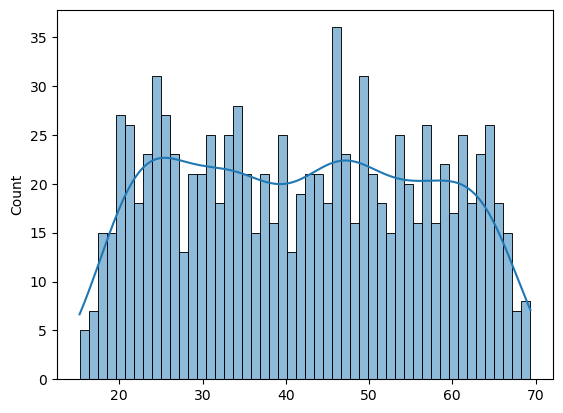

In [10]:
averages=[df.loc[i,:].mean() for i in range(0,1000)]
sns.histplot(averages,bins=50,kde=True)

c:\Users\dsai9\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

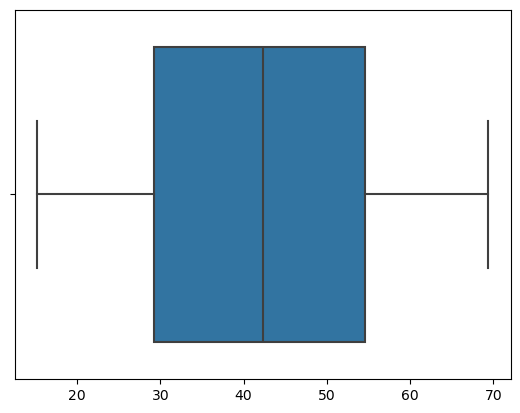

In [11]:
sns.boxplot(x=averages)

### Observation
- If mean of values is less than 40, then 0-- no avalanche
- If mean of values is greater than 40, then 1-- avalanche is imminent


In [22]:
def encode_averages(x):
    if x<40:
        return 0
    return 1
df['Avalanche']=[encode_averages(i) for i in averages ]

In [23]:
df

,SnowPack Depth,Snow Density,Slope Angle,Temperature Gradient,Snowfall Intensity,Avalanche
0,143.635030,0.174053,26.542642,0.017270,5.719959,0
1,287.678577,0.316760,26.174470,0.029668,8.054323,1
2,232.998485,0.449178,42.656365,-0.024953,7.601609,1
3,199.664621,0.392890,26.238655,0.012487,1.538999,1
4,89.004660,0.422624,26.798743,0.007175,1.492495,0
...,...,...,...,...,...,...
995,72.895518,0.362782,41.632394,-0.005789,8.973973,0
996,279.328394,0.482646,23.931830,-0.016560,1.193810,1
997,84.204658,0.127583,27.744696,-0.010543,3.278428,0
998,287.559338,0.122822,27.251138,0.002994,8.157454,1


<Axes: >

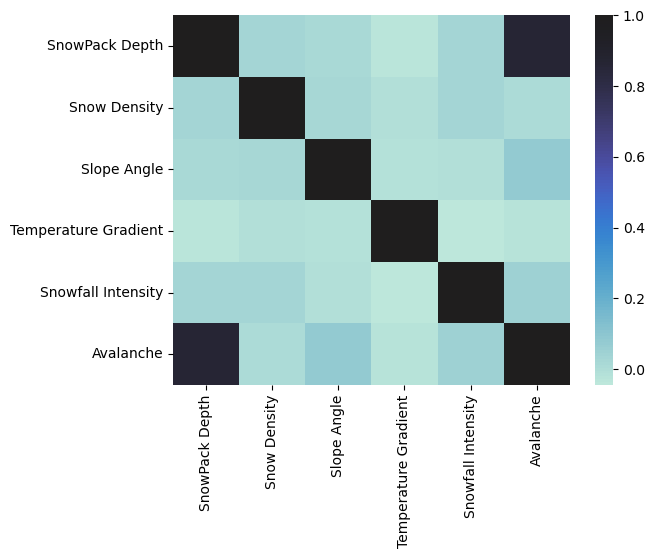

In [24]:
sns.heatmap(data=df.corr(),center=1)

In [27]:
df.to_csv(r'C:\Users\dsai9\Projects\Avalanche Prediction\data\avalanche_prediction.csv')

# Model Building